# Homework 2
## Homework guideline
- The deadline is Oct 27th 10:30am. Submission after the deadline will not be graded. 

- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point. 

- Please justify all short answers with a brief explanation.

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to. 

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources but work on your own!

In [36]:
%pylab inline 


Populating the interactive namespace from numpy and matplotlib


# Modified MNIST
I modified the the original MNIST gray-scale image dataset, where samples of digit 9 belong to class 1, and otherwise class 0. Now it becomes binary logistic regression. 
It contains a training set of images $\texttt{Xtr}$ with labels $\texttt{Ytr}$ and a testing set
of images $\texttt{Xte}$ with labels $\texttt{Yte}$. There are 6000 samples in training sets and 1000 samples in testing sets.

In [37]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
Xtr                   = train_X[0:6000, :]
train_y_part          = train_y[0:6000]
Ytr                   = zeros(train_y_part.size)
Ytr[train_y_part==9]=1

Xte                   = test_X[0:1000,:]
test_y_part           = test_y[0:1000]
Yte  = zeros(test_y_part.size)
Yte[test_y_part==9]=1

print('Xtr: ' + str(Xtr.shape))
print('Ytr: ' + str(Ytr.shape))
print('Xte: '  + str(Xte.shape))
print('Yte: '  + str(Yte.shape))



Xtr: (6000, 28, 28)
Ytr: (6000,)
Xte: (1000, 28, 28)
Yte: (1000,)


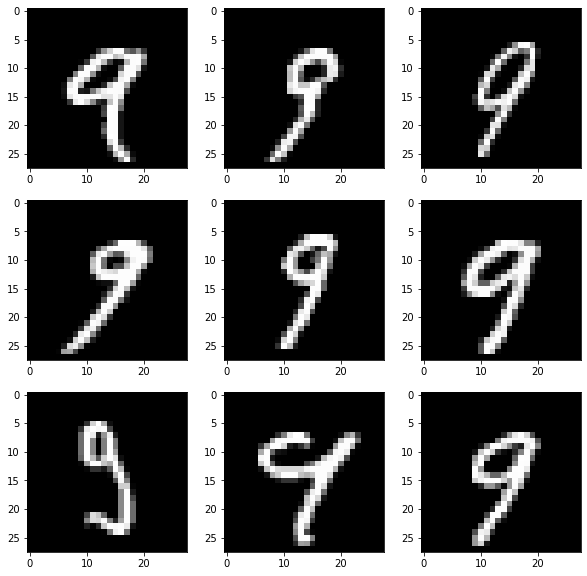

In [38]:
fig, axs = plt.subplots(3, 3,figsize=(10,10))
axs = axs.ravel()
index = where(Ytr>0)[0]
for i in range(9):
    axs[i].imshow(Xtr[index[i]], cmap=pyplot.get_cmap('gray'))

## Q1: Logistic regression (20pt)

---


### 1. Data preparation for training and testing (5pt)
Prepare your matrix $\mathbf{X}$ and your output label $\mathbf{y}$ for the training data. Please count the number of 9 out of these 60000 training set. What is the dimension of the matrix $\mathbf{X}$. Don't forget to do the same preparation for the testing data. 

In [39]:
 #@title Q1.1 your code starts here
import numpy as np

Xtr =  hstack([ones((train_X.shape[0],1)), train_X.reshape(60000, 28*28)])
#Rechaning the shape of the matrix to (60000,785)

train_y_part          = train_y
Ytr                   = zeros(train_y_part.size)
Ytr[train_y_part==9]=1 # Making all the 9 numbers as '1' in the data set.

# Chaning the data set from (1000,28,28) to (10000,28,28)
Xte                   = test_X 
test_y_part           = test_y
Yte  = zeros(test_y_part.size)
# Chaning the data set from (1000,) to (10000,)
Yte[test_y_part==9]=1

print('Xtr: ' + str(Xtr.shape))
print('Ytr: ' + str(Ytr.shape))
print('Xte: '  + str(Xte.shape))
print('Yte: '  + str(Yte.shape))
#The code below is to count the number of '9' digits persent in 60000 traning set.
 count = 0
 for i in Ytr:
   count+=i
 print(count)

Xtr: (60000, 785)
Ytr: (60000,)
Xte: (10000, 28, 28)
Yte: (10000,)
5949.0


### **Your Answer:**


---
### 2. Logistic regression (15pt)

Perform logistic regression with the sigmoid activation function using **mini-batches descent method**. The mini-batch size is 25, the learning rate is $\eta_t = \frac{1}{(1+2t)^3}$ and total iteration number is $50$. You might need to restart the training with better initial conditions. Modify my code to accomodate it. 

Please use the testing set to validate the logistic regression model. What is the test error rate?  Could you plot serveral pictures that logistic regression model misclassified the digit 9. 


In [40]:
 #@title Q1.2 your code starts here
# Sigmiod activation Function 
def predict(x, w):
	z = w.dot(x)

	return 1.0 / (1.0 + exp(-z))
 
# Mini-batches descent method.
def train_weights(X, y, l_rate_span, n_iter, threshold=0.002):
  n, m    = X.shape
  weights = zeros(m) # Initial condition is always 0 vector. it is a bad idea! 
  # you should modify this code to make IC as an input. Then you can call this call function put the last weight as the new initial condition.
  for iter in range(n_iter):
    l_rate   = l_rate_span[iter]
    sum_error = 0;
    arr = np.arange(n)
    random.shuffle(arr)
# Taking mini-batch size is 25.
    for i in arr[0:25]:
      prediction = predict(X[i,:], weights)
      error      = prediction - y[i]
      sum_error  = error**2 + sum_error
      weights    = weights - l_rate * error * X[i,:]
    print('sum_error at ',iter+1, 'iteration is ', sum_error) # Prints the values of 50 iteration.
    if sum_error<threshold:
      break


  return weights

#Using the '50' Iteration.
n_iter = 50
n_span = arange(n_iter)
l_rate_span = 1/((1+2 * n_span)**3) # Learning rate is ηt=1/(1+2t)3
#print(l_rate_span)
weights = train_weights(Xtr, Ytr, l_rate_span, n_iter) #you should restart with the new IC. 
#print(weights)

#Sum error stops when ever we get '0'.



sum_error at  1 iteration is  5.25
sum_error at  2 iteration is  6.0
sum_error at  3 iteration is  11.0
sum_error at  4 iteration is  6.0
sum_error at  5 iteration is  10.0
sum_error at  6 iteration is  15.0
sum_error at  7 iteration is  4.0
sum_error at  8 iteration is  7.0
sum_error at  9 iteration is  8.0
sum_error at  10 iteration is  8.0
sum_error at  11 iteration is  8.0
sum_error at  12 iteration is  7.0
sum_error at  13 iteration is  9.0
sum_error at  14 iteration is  7.0
sum_error at  15 iteration is  9.0
sum_error at  16 iteration is  10.0
sum_error at  17 iteration is  10.0
sum_error at  18 iteration is  10.0
sum_error at  19 iteration is  9.0
sum_error at  20 iteration is  10.0
sum_error at  21 iteration is  7.0
sum_error at  22 iteration is  11.0
sum_error at  23 iteration is  10.0
sum_error at  24 iteration is  4.0
sum_error at  25 iteration is  4.0
sum_error at  26 iteration is  12.0
sum_error at  27 iteration is  9.0
sum_error at  28 iteration is  4.0
sum_error at  29 i

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


6.0
sum_error at  34 iteration is  9.0
sum_error at  35 iteration is  8.0
sum_error at  36 iteration is  9.0
sum_error at  37 iteration is  10.0
sum_error at  38 iteration is  10.0
sum_error at  39 iteration is  5.0
sum_error at  40 iteration is  12.0
sum_error at  41 iteration is  10.0
sum_error at  42 iteration is  8.0
sum_error at  43 iteration is  9.0
sum_error at  44 iteration is  12.0
sum_error at  45 iteration is  9.0
sum_error at  46 iteration is  10.0
sum_error at  47 iteration is  9.0
sum_error at  48 iteration is  5.0
sum_error at  49 iteration is  9.0
sum_error at  50 iteration is  4.0


### **Your Answer:**






## Q2: Support Vector Machine (50pt)


---

### 1. Data preparation for training and testing (5pt)
Remember in SVM we move the interception out and define the class label is $\pm1$. Prepare your matrix $\mathbf{X}$ and your output label $\mathbf{y}$ for the training data. Don't forget to do the same preparation for the testing data. 

Can you impose the hard margin classifier for this problem? Why or why not?


In [41]:
 #@title Q2.1 your code starts here

Xtr =  train_X.reshape(60000, 28*28)
#Rechaning the shape of the matrix to (60000,784)


train_y_part          = train_y
Ytr                   = ones(train_y_part.size)*-1#Here it gives all '9' as "1" and reamining instead as '0' gives '-1'.
Ytr[train_y_part==9]=1 # Making all the 9 numbers as '1' in the data set.
print(Ytr)


print('Xtr: ' + str(Xtr.shape))
print('Ytr: ' + str(Ytr.shape))

[-1. -1. -1. ... -1. -1. -1.]
Xtr: (60000, 784)
Ytr: (60000,)




---


### 2. Soft Margin with Hinge Loss (15pt)
Perform the soft margin with hinge loss using stochastic gradient descent method. 
$$\boxed{\min_{\mathbf{w}\in \mathbb{R}^d, w_0\in \mathbb{R}} \lambda\sum_{i=1}^N \max\left\{0, 1-\mathbf{y}^{(i)}(\mathbf{w}^\top \mathbf{x}^{(i)}+w_0)\right\} +\frac{1}{2} \|\mathbf{w}\|_2^2 }$$
The learning rate is $\eta_t = \frac{1}{(1+2t)^2}$ and total iteration number is $100$. The regulation parameter $\lambda$ is selected as follows, 
$$ \lambda\in \{10^{-4},10^{-3},10^{-2},10^{-1},1,10,100,1000,10000 \}$$
Report the test error rates for each $\lambda$ and find the best parameter $\lambda$. 
You might need to restart the training with better initial conditions. 


In [51]:
 #@title Q2.2 your code starts here
def predict(x, w, w0):
	activation = w.dot(x)+w0

	return 1 if activation >= 0.0 else -1

#Loss code.
def LOSS_f(X,y,w,w0,lambda_param):
   N,d = X.shape
   LOSS = 1/2 * lambda_param * norm(w)**2
   for i in range(N):
     condition = 1 - y[i] * (w.dot(X[i,:])+w0)
     LOSS = LOSS + max(condition, 0)
   return LOSS  
#Comdition we need to use for getting the erorr rate and best lambda value.
def train_weights(X, y, learning_rate_span,lambda_param, n_iter):
  N,d = X.shape
  w   = ones(28*28)*(-1)
  w[1] = 2
  w0  = 2
  for iter in range(n_iter):
    learning_rate = learning_rate_span[iter]
    arr = np.arange(N)
    random.shuffle(arr)
    for i in arr[0:100]:# we using random 100 values from the data set.
          condition = y[i] * (w.dot(X[i,:])+w0) >= 1#this the condition we used to solve the Loss.
          if condition:
            w = w - learning_rate *  w

          else:
            w  = w - learning_rate * (w - lambda_param *y[i] * X[i,:] )
            w0 = w0 - learning_rate * ( -lambda_param * y[i] ) 
    #print(iter)
  return w, w0 


n_iter = 100
n_span = arange(n_iter)
l_rate_span = 1/((1+ n_span)**2) 
Losses = []
least_loss = 10000000 
best_lambda = 0
for lambda_param in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]: # Using the given lambda values.
  w, w0 = train_weights(Xtr, Ytr, l_rate_span, lambda_param, n_iter) 
  current_loss = LOSS_f(Xtr, Ytr, w, w0, lambda_param)
  Losses.append(current_loss)#adding losses with the current losses
  if current_loss<least_loss:
    least_loss = current_loss#Gives the least values out of 100 values after iternation.
    best_lambda = lambda_param#Gives the best lambda value.
print("Least loss value is:",least_loss)
print("Best_lambda value is:",best_lambda)
#Least value changes every time.
#we used 100 values and labdma value is '0.001', which the best value and least eroor rate '10168.69089916671.
# when chaning the value the error rate and lambda value is increasins, when we take more 100 values from the dataset and it decrease when it is below 100 values.

Least loss value is: 11259.251218582258
Best_lambda value is: 0.001




---


### 3. Prepare for soft margin with log loss (10pt)
Please compute the following two gradient:
$$ \nabla_\mathbf{w} \log\left(1+e^{-y^{(i)}(\mathbf{w}^\top\mathbf{x}^{(i)}+w_0 )}\right)= $$

$$ \nabla_{w_0}\log\left(1+e^{-y^{(i)}(\mathbf{w}^\top\mathbf{x}^{(i)}+w_0 )}\right)=$$


### **Your Answer:**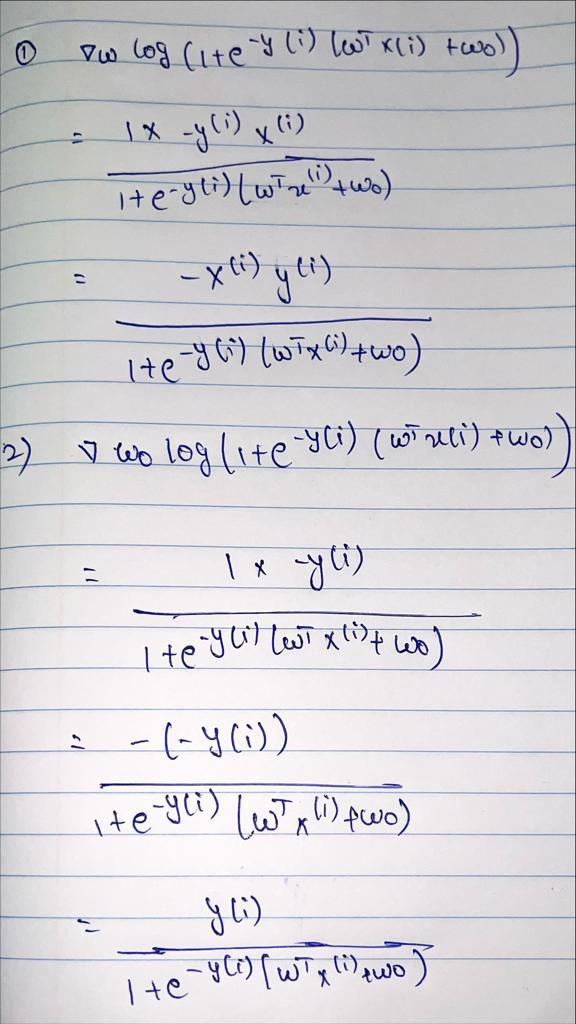



---


### 4. Soft Margin with Log Loss (20pt)
Perform the soft margin with log loss using stochastic gradient descent method.
$$\boxed{\min_{\mathbf{w}\in \mathbb{R}^d, w_0\in\mathbb{R}}  \lambda \sum_{i=1}^N\log\left(1+e^{-y^{(i)}(\mathbf{w}^\top\mathbf{x}^{(i)}+w_0 )}\right)  +\frac{1}{2}\|\mathbf{w}\|_2^2 } $$
Similarly, the learning rate is $\eta_t = \frac{1}{(1+2t)^2}$ and total iteration number is $100$. The regulation parameter $\lambda$ is selected as follows, 
$$ \lambda\in \{10^{-4},10^{-3},10^{-2},10^{-1},1,10,100,1000,10000 \}$$
Report the test error rates for each $\lambda$ and find the best parameter $\lambda$. 
You might need to restart the training with better initial conditions. 


In [43]:
 #@title Q2.4 your code starts here


### **Your Answer:**


---


### 5. Optional problem: try the kernel trick 
You can try to use the kernel trick with various different $\sigma^2$ and $\lambda$. What is your difficulty and your findings here? 

### **Your Answer:**





## Q3: $k$-NN on Iris data (30pt)


---

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a $150\times4$ matrices.

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.




In [44]:
# you are not allowed to use other package and modules 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

# Split in training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, stratify=y)

print(X_train.shape)
print(X_test.shape)

(60, 4)
(90, 4)


## 1. Use 5-fold cross validation to find optimal $k$ (20pt)
Here we only use the training dataset, `X_train` and `y_train`. We will test $k$ range from 1 to 21. For each $k$, we will use 5-fold cross validation to estimate the average misclassification rate. Please plot the average misclassification rate verse $k$ and find the optimal $k$. 

train_errs are: [0.0, 0.25, 0.16666666666666666, 0.25, 0.3333333333333333, 0.3333333333333333, 0.16666666666666666, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.25, 0.25, 0.3333333333333333, 0.4166666666666667, 0.4166666666666667, 0.5, 0.5, 0.5]
scores are: [0.0, 0.125, 0.13888888888888887, 0.16666666666666666, 0.2, 0.2222222222222222, 0.21428571428571427, 0.22916666666666663, 0.24074074074074073, 0.25, 0.25757575757575757, 0.2638888888888889, 0.2692307692307693, 0.2678571428571429, 0.26666666666666666, 0.2708333333333333, 0.27941176470588236, 0.28703703703703703, 0.29824561403508776, 0.30833333333333335, 0.3174603174603175]


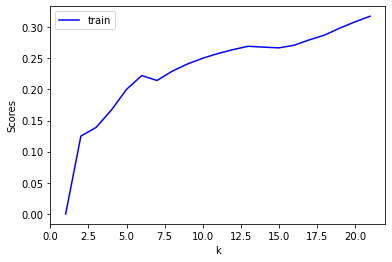

[1.0, 0.75, 0.8333333333333334, 0.75, 0.6666666666666667, 0.6666666666666667, 0.8333333333333334, 0.6666666666666667, 0.6666666666666667, 0.6666666666666667, 0.6666666666666667, 0.6666666666666667, 0.6666666666666667, 0.75, 0.75, 0.6666666666666667, 0.5833333333333333, 0.5833333333333333, 0.5, 0.5, 0.5]
Best value of k: 19


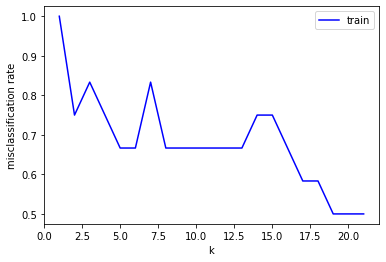

KNN accuracy on test set of {} points: 0.9


In [49]:
# my KNN implementation
# This the code from ur class note and started editing this.
def myknn_predict(k, X_train, y_train):
  labelEst = np.ones(X_train.shape[0])
  for i, x in enumerate(X_train):
    dist            = norm(X_train - x, axis=1)#2norm
    dist_sort_index = argsort(dist)
    neigh_labels    = y_train[dist_sort_index[0:k]]
    labelEst[i]     = argmax(bincount(neigh_labels))
  return labelEst
 #Y_train 
ks         = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]#1,21 values 
scores =[]
train_errs=[]
CV = 5 #five cross-validation 
N_train    = y_train.shape[0]
batch      = N_train/CV
for k in ks:
  y_train_predicted = myknn_predict(k, X_train, y_train)
  train_errs.append(norm(y_train_predicted - y_train,0)/batch)#2norm/batch
  scores.append(mean(train_errs))#Gives the mean value of the test_err.
print("train_errs are:", train_errs)# train error values for y train set
print("scores are:", scores)

#Graph with KS and score just crossing checking with the missclassification rate.
plt.figure()
plt.plot(ks, scores , 'b-', label='train')
plt.legend()
plt.xlabel('k')
plt.ylabel('Scores')
plt.show()

MSE = [1-x for x in train_errs]#Misclassification rate.
print(MSE)
best_k = ks[MSE.index(min(MSE))]
print("Best value of k:",best_k)# gives you the best value of the 

plt.figure()
plt.plot(ks, MSE , 'b-', label='train')
plt.legend()
plt.xlabel('k')
plt.ylabel('misclassification rate')
plt.show()

#Gives plot the MSE but the graphs change because the error_rate is not costant every time if the error rate change then the graphs also according to that.

# Set up the hyperparameters

y_train_predicted = myknn_predict(k, X_train, y_train)
print('KNN accuracy on test set of {} points:',(1-norm(y_train_predicted - y_train, 0)/X_train.shape[0]))
plt.show((1-norm(y_train_predicted - y_train, 0)/X_train.shape[0]))



## 2. Use optimal $k$ to predict in the test dataset (10pt)
Now we have the optimal $k$. We will apply the optimal $k$-NN on the test dataset and please estimate the misclassification rate in the test dataset. 

In [53]:
 #@title Q3.2 your code starts here
 # This the code from ur class note and started editing this.
def myknn_predict_prob(k, X_train, y_train):
  labelEst_prob = np.zeros(X_train.shape[0])
  for i, x in enumerate(X_train):
    dist            = norm(X_train - x, axis=1)
    dist_sort_index = argsort(dist)
    neigh_labels    = y_train[dist_sort_index[0:k]]
    labelEst_prob[i]     = sum(neigh_labels == y_train)/k
  return labelEst_prob
k=18 # As, i feel this the best "k" value.
train_errs = []
test_errs  = []
N_train    = y_train.shape[0]
y_train_predicted = myknn_predict(k, X_train, y_train)
train_errs.append(norm(y_train_predicted - y_train,0)/N_train)
print("train_errs is:", train_errs)# Missclaffication error.
# every time K value change and even the error_rate change because error_rate is like noise in the graph.
# Even K changes due to range uis from(1-21).


train_errs is: [0.08333333333333333]
